# Problem Statement

#### Goal

Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio. 

Nirav Patel https://github.com/nspatel34/Temp-Deposit-Predictions-w-Ensemble-Technique.git

#### Resources Available:

The historical data for this project is available in file: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

#### Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)

1. Univariate analysis (12 marks)
    
    a. Univariate analysis – data types and description of the independent attributes
    which should include (name, meaning, range of values observed, central values
    (mean and median), standard deviation and quartiles, analysis of the body of
    distributions / tails, missing values, outliers.
   
   b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
   
   c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

2. Multivariate analysis (8 marks)

    a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.
    
    b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots
    
#### Deliverable – 2 (Prepare the data for analytics) – (10)

1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

#### Deliverable – 3 (create the ensemble model) – (30)

1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)

2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)

3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)

#### Attribute information

Input variables:

#### Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account

#### Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds

#### Other attributes:
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of times the client has been contacted before for the last campaign to subscribe term deposit
16. poutcome: outcome of the previous marketing campaign Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

In [1]:
import warnings
warnings.filterwarnings('ignore')

# linear algebra
import numpy as np

# data processing
import pandas as pd
from pandas_profiling import ProfileReport

# import matplotlib.pyplot as plt # matplotlib.pyplot plots data
import matplotlib.pyplot as plt # matplotlib.pyplot plots data
%matplotlib inline 

# import seaborn
import seaborn as sns
sns.set(color_codes=True)

# sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import Normalizer
#linear regression
from sklearn.linear_model import LinearRegression
# logistic regresison
from sklearn.linear_model import LogisticRegression
#importing the Encoding library
from sklearn.preprocessing import LabelEncoder
# Sklearn package's randomized data splitting function
from sklearn.model_selection import train_test_split
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
# calculate accuracy measures and confusion matrix
from sklearn import metrics 
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_curve,precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
#Ensemble classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import IsolationForest

#statsmodel
import statsmodels.api as sm
from scipy import stats
from scipy.stats import zscore

#Stats package for statistical analysis
from scipy import stats

## Deliverable – 1 (Exploratory data quality report reflecting the following)

In [2]:
df = pd.read_csv("bank-full.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### --> Summary
1. 17 total variables
    - 7 numberic variables
    - 10 string variables

#Categorical columns
cat_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']

#Looping through the columns and changing type to 'category'
for column in cat_col:
    df[column] = df[column].astype('category')

In [4]:
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

In [5]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


#### --> summary
1. Mean age is 41 years old.
2. Mean balance is 1362 w/ a large std. Balance is heavily distributed over the data. 
3. Mean duration is 258 w/ a std of 258. Duration is also widely distributed over the data. 
4. There are negative balances

### Univariate Analysis/Bivariate Analysis/Multivariate Analysis

### Analysis of Numerical variables

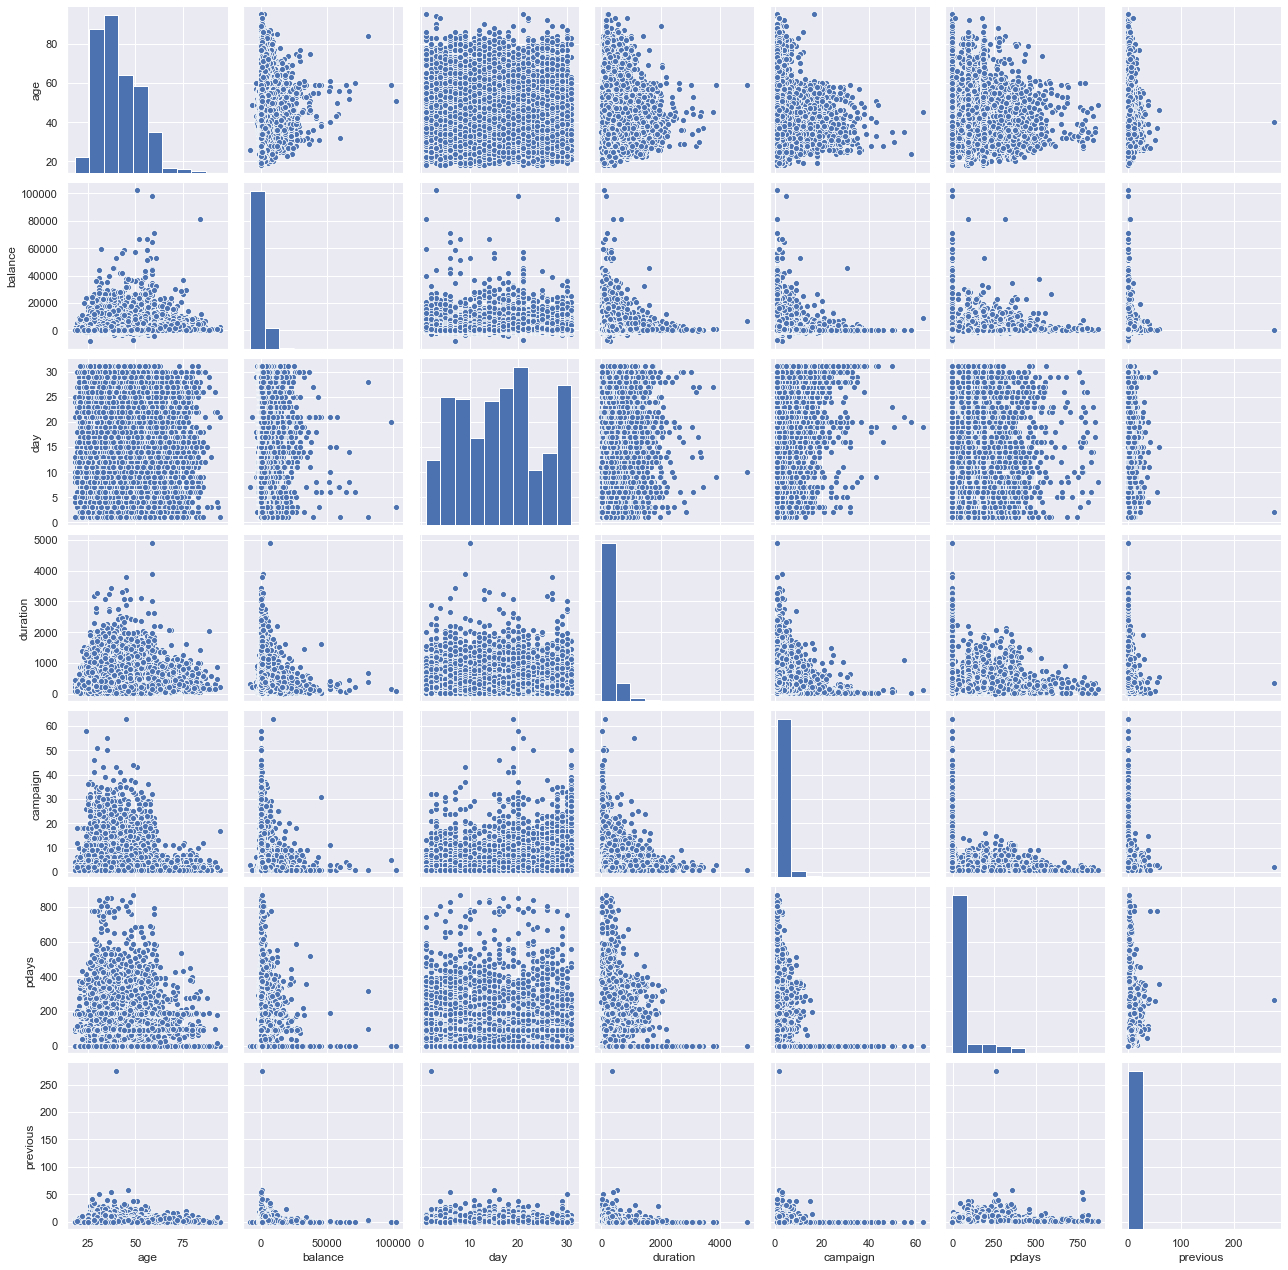

In [7]:
sns.pairplot(df)

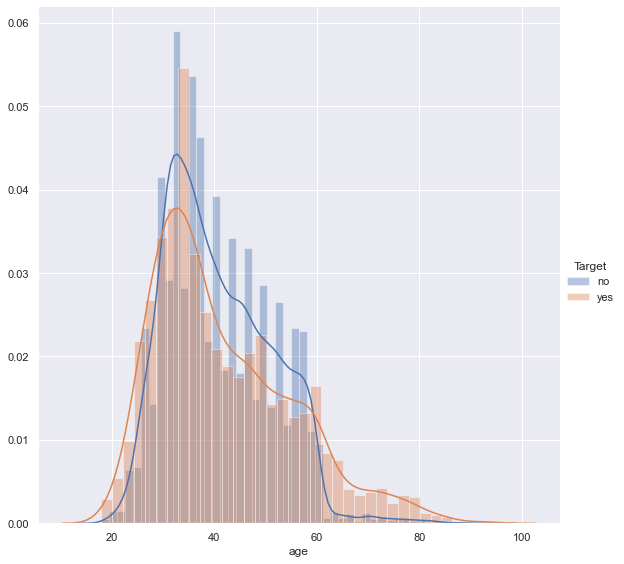

In [8]:
# age distribution
sns.FacetGrid(df, hue = "Target", size = 8).map(sns.distplot,"age").add_legend()

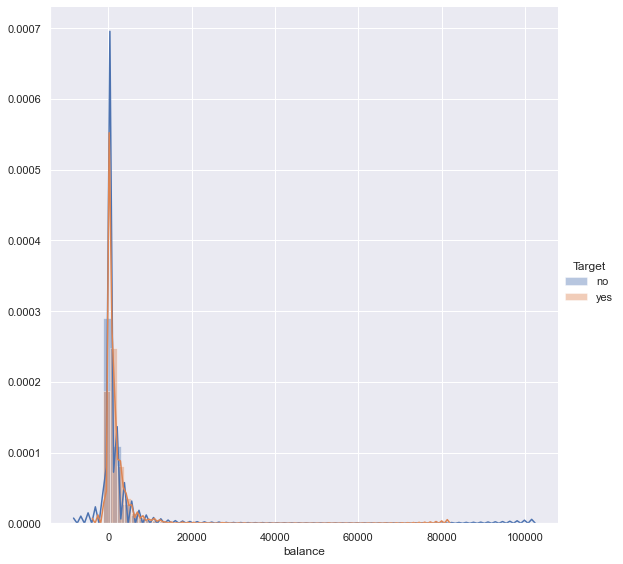

In [9]:
# distribution of balance in account
sns.FacetGrid(df, hue = "Target", size = 8).map(sns.distplot,"balance").add_legend()

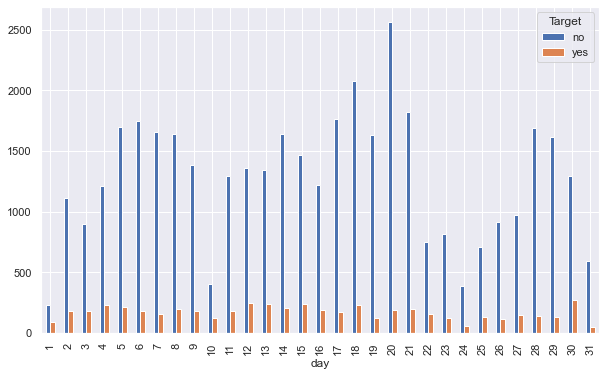

In [10]:
# last contact day of the month
#sns.FacetGrid(df, hue = "Target", size = 8).map(sns.distplot,"day").add_legend()
pd.crosstab(df.day,df.Target).plot(kind='bar',figsize=(10,6))

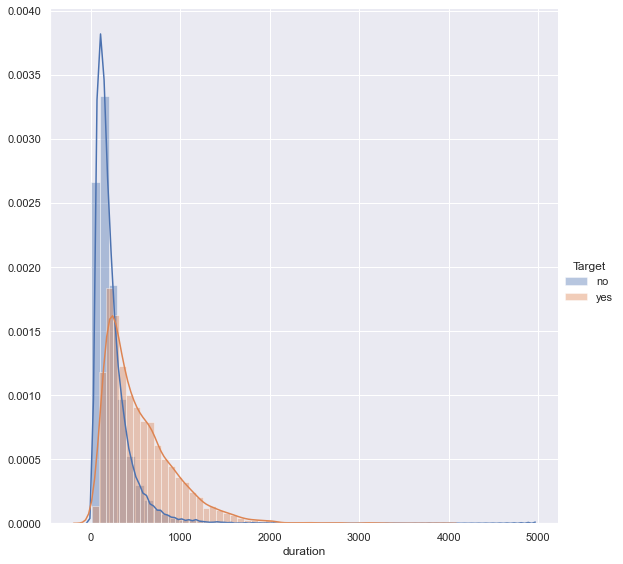

In [11]:
# Last contact duration in seconds
sns.FacetGrid(df, hue = "Target", size = 8).map(sns.distplot,"duration").add_legend()

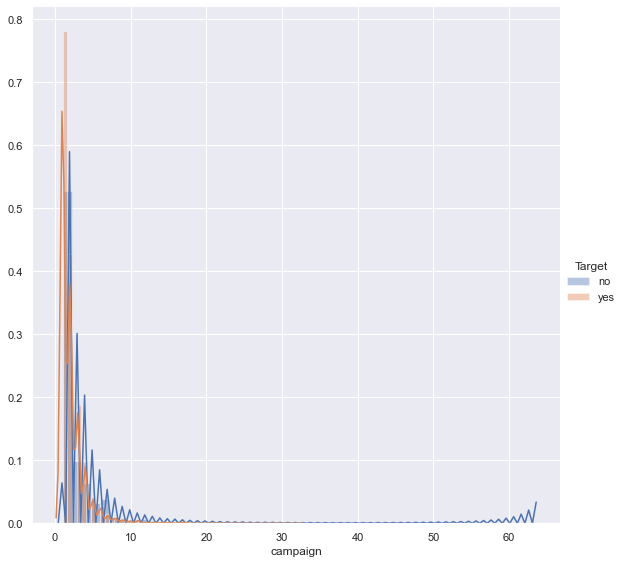

In [12]:
# number of contacts performed during this campaign and for this client
sns.FacetGrid(df, hue = "Target", size = 8).map(sns.distplot,"campaign").add_legend()

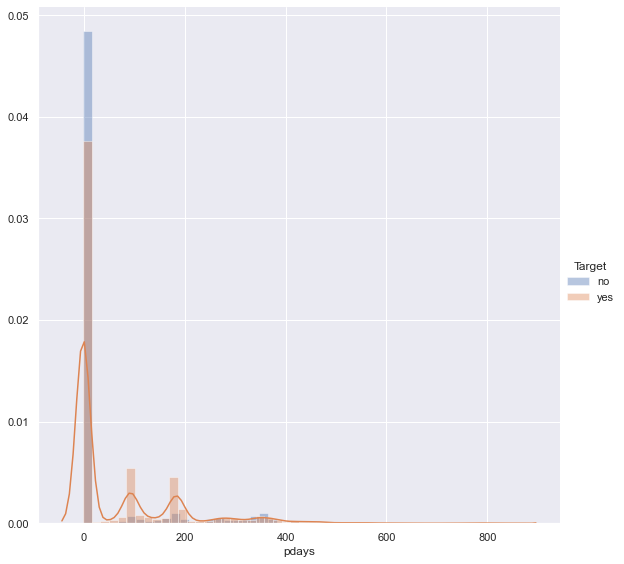

In [13]:
# number of days that passed by after the client was last contacted from a previous campaign 
# (-1 tells us the person has not been contacted or contact period is beyond 900 days)
sns.FacetGrid(df, hue = "Target", size = 8).map(sns.distplot,"pdays").add_legend()

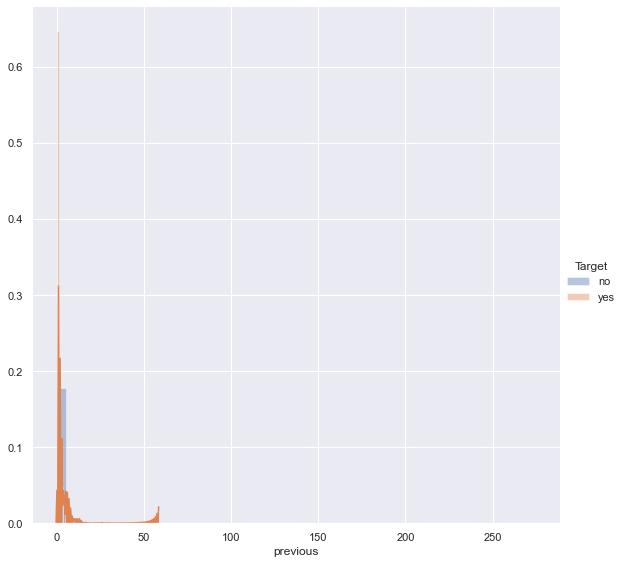

In [14]:
# number of contacts performed before this campaign and for this client
sns.FacetGrid(df, hue = "Target", size = 8).map(sns.distplot,"previous").add_legend()

#### --> Observations
1. Age has a right skew. Might need to normalize the distribution. 
2. Balance has very heavy right skew. Has negative values, might need to normalize and treat for outliers.
3. Day in month has three peaks.  
4. Duration has a heavy right skew, might need to treat outliers. 
5. Campaign has heavy right skew, might need to tret outliers. 
6. Pdays is right skewed as most people haven't been contacted in over 900 days. 
7. Previous skews very heavy right with most customers not being contacted at all. Will need to treat outliers.

In [15]:
# Confirming Skewness of numerical variables
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.age),stats.skew(df.day),stats.skew(df.balance),stats.skew(df.duration),stats.skew(df.campaign),stats.skew(df.pdays),stats.skew(df.previous) ]},
                        index=['age','day','balance', 'duration', 'campaign', 'pdays', 'previous'])  # Measure the skeweness of the required columns
Skewness

,Skewness
age,0.684795
day,0.093076
balance,8.360031
duration,3.144214
campaign,4.898488
pdays,2.615629
previous,41.845066


#### Will need to adress the highly skewed variables in the data prep process

### Analysis of Categorical variables

##### Look at value count percentages for categorical variables 

In [16]:
df.Target.value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: Target, dtype: float64

- 11.6% of of the respondents to the current campaign have actually subscribed for a deposit as a result of the campaign. This is really unbalanced. 


Target           no   yes
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34

Target               no       yes
job                              
admin.         0.877973  0.122027
blue-collar    0.927250  0.072750
entrepreneur   0.917283  0.082717
housemaid      0.912097  0.087903
management     0.862444  0.137556
retired        0.772085  0.227915
self-employed  0.881571  0.118429
services       0.911170  0.088830
student        0.713220  0.286780
technician     0.889430  0.110570
unemployed     0.844973  0.155027
unknown        0.881944  0.118056



blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

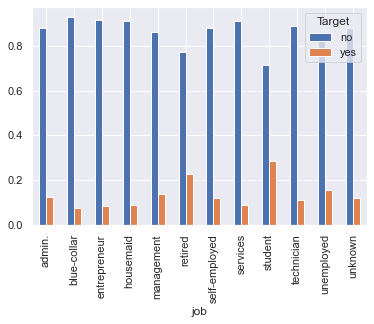

In [17]:
# Type of job (management, technician, entrepreneur, blue-collar, etc.)
df_job=pd.crosstab(df['job'],df['Target'])
df_job.div(df_job.sum(1).astype(float),axis=0).plot(kind='bar', stacked=False)
print('')
print(df_job)
print('')
print(df_job.div(df_job.sum(1).astype(float),axis=0))
print('')
df.job.value_counts(normalize=True)

- 71% of the jobs fall into the 4 categories (blue-collar, management, technician, admin)
- Student, Management, retired and admins are more likely to have term deposits.


Target       no   yes
marital              
divorced   4585   622
married   24459  2755
single    10878  1912

Target          no       yes
marital                     
divorced  0.880545  0.119455
married   0.898765  0.101235
single    0.850508  0.149492



married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

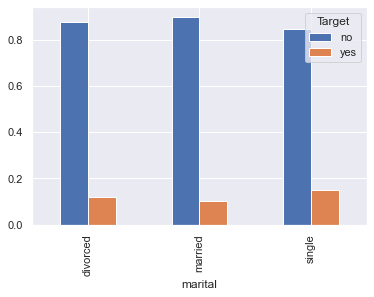

In [18]:
# marital status (married, single, divorced)
df_mar=pd.crosstab(df['marital'],df['Target'])
df_mar.div(df_mar.sum(1).astype(float),axis=0).plot(kind='bar', stacked=False)
print('')
print(df_mar)
print('')
print(df_mar.div(df_mar.sum(1).astype(float),axis=0))
print('')
df.marital.value_counts(normalize=True)

- 60:40 split between married and (divorced/single)
- single, non divorced most likely to have a term deposit


Target        no   yes
education             
primary     6260   591
secondary  20752  2450
tertiary   11305  1996
unknown     1605   252

Target           no       yes
education                    
primary    0.913735  0.086265
secondary  0.894406  0.105594
tertiary   0.849936  0.150064
unknown    0.864297  0.135703



secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

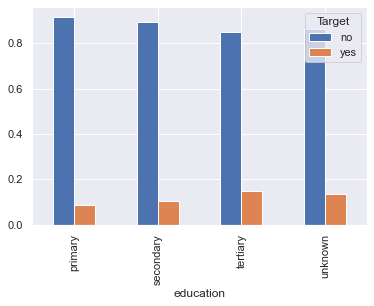

In [19]:
# education level (primary, secondary, tertiary)
df_edu=pd.crosstab(df['education'],df['Target'])
df_edu.div(df_edu.sum(1).astype(float),axis=0).plot(kind='bar', stacked=False)
print('')
print(df_edu)
print('')
print(df_edu.div(df_edu.sum(1).astype(float),axis=0))
print('')
df.education.value_counts(normalize=True)

- Most of the people fall into the secondary education category. Unknown is a small percentage and can be dropped. 
- Tertiary more likely to have a term deposit. 


Target      no   yes
default             
no       39159  5237
yes        763    52

Target         no       yes
default                    
no       0.882039  0.117961
yes      0.936196  0.063804



no     0.981973
yes    0.018027
Name: default, dtype: float64

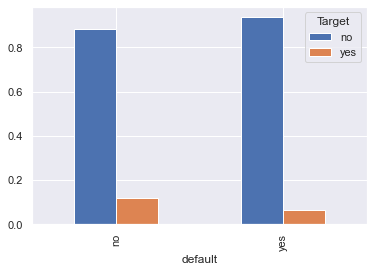

In [20]:
# has credit in default?
df_def=pd.crosstab(df['default'],df['Target'])
df_def.div(df_def.sum(1).astype(float),axis=0).plot(kind='bar', stacked=False)
print('')
print(df_def)
print('')
print(df_def.div(df_def.sum(1).astype(float),axis=0))
print('')
df.default.value_counts(normalize=True)

- ~2% have default credit values.
- Those without defaults more likely to have term deposits.


Target      no   yes
housing             
no       16727  3354
yes      23195  1935

Target         no       yes
housing                    
no       0.832976  0.167024
yes      0.923000  0.077000



yes    0.555838
no     0.444162
Name: housing, dtype: float64

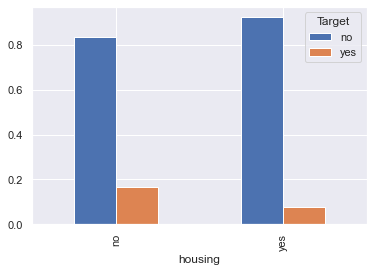

In [21]:
# has housing loan?
df_h=pd.crosstab(df['housing'],df['Target'])
df_h.div(df_h.sum(1).astype(float),axis=0).plot(kind='bar', stacked=False)
print('')
print(df_h)
print('')
print(df_h.div(df_h.sum(1).astype(float),axis=0))
print('')
df.housing.value_counts(normalize=True)

- 56% percent of people have housing loans.
- Those without housimg loans more likely to have a term deposit. 


Target     no   yes
loan               
no      33162  4805
yes      6760   484

Target         no  yes
admin.        NaN  NaN
blue-collar   NaN  NaN
entrepreneur  NaN  NaN
housemaid     NaN  NaN
management    NaN  NaN
no            NaN  NaN
retired       NaN  NaN
self-employed NaN  NaN
services      NaN  NaN
student       NaN  NaN
technician    NaN  NaN
unemployed    NaN  NaN
unknown       NaN  NaN
yes           NaN  NaN



no     0.839774
yes    0.160226
Name: loan, dtype: float64

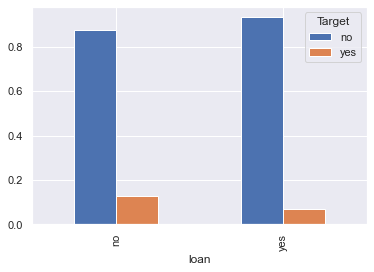

In [22]:
# has personal loan?
df_l=pd.crosstab(df['loan'],df['Target'])
df_l.div(df_l.sum(1).astype(float),axis=0).plot(kind='bar', stacked=False)
print('')
print(df_l)
print('')
print(df_l.div(df_job.sum(1).astype(float),axis=0))
print('')
df.loan.value_counts(normalize=True)

- 16% have loans.
- Those without loans more likely to have term deposits.


Target        no   yes
contact               
cellular   24916  4369
telephone   2516   390
unknown    12490   530

Target           no       yes
contact                      
cellular   0.850811  0.149189
telephone  0.865795  0.134205
unknown    0.959293  0.040707



cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64

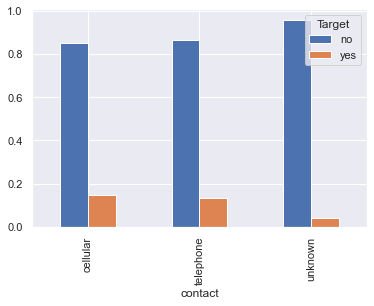

In [23]:
# customers last contact communication type
df_c=pd.crosstab(df['contact'],df['Target'])
df_c.div(df_c.sum(1).astype(float),axis=0).plot(kind='bar', stacked=False)
print('')
print(df_c)
print('')
print(df_c.div(df_c.sum(1).astype(float),axis=0))
print('')
df.contact.value_counts(normalize=True)

- A large percentage have unknown contact information ~29%
- Those with contact information more likely to have a term deposit. 


Target     no  yes
month             
apr      2355  577
aug      5559  688
dec       114  100
feb      2208  441
jan      1261  142
jul      6268  627
jun      4795  546
mar       229  248
may     12841  925
nov      3567  403
oct       415  323
sep       310  269

Target        no       yes
month                     
apr     0.803206  0.196794
aug     0.889867  0.110133
dec     0.532710  0.467290
feb     0.833522  0.166478
jan     0.898788  0.101212
jul     0.909065  0.090935
jun     0.897772  0.102228
mar     0.480084  0.519916
may     0.932805  0.067195
nov     0.898489  0.101511
oct     0.562331  0.437669
sep     0.535406  0.464594



may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: month, dtype: float64

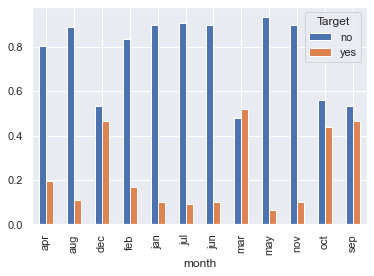

In [24]:
# last contact month of year
df_m=pd.crosstab(df['month'],df['Target'])
df_m.div(df_m.sum(1).astype(float),axis=0).plot(kind='bar', stacked=False)
print('')
print(df_m)
print('')
print(df_m.div(df_m.sum(1).astype(float),axis=0))
print('')
df.month.value_counts(normalize=True)

- Skewness towards summer months (May-Aug), with more than 30% of all contacts happening in May.
- March (51%), Sept (46%), and Oct (44%) more likely to  have term deposit. 


Target       no   yes
poutcome             
failure    4283   618
other      1533   307
success     533   978
unknown   33573  3386

Target          no       yes
poutcome                    
failure   0.873903  0.126097
other     0.833152  0.166848
success   0.352747  0.647253
unknown   0.908385  0.091615



unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

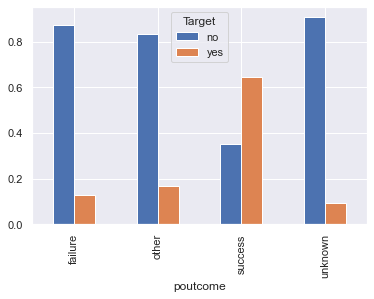

In [25]:
# outcome of the previous marketing campaign
df_po=pd.crosstab(df['poutcome'],df['Target'])
df_po.div(df_po.sum(1).astype(float),axis=0).plot(kind='bar', stacked=False)
print('')
print(df_po)
print('')
print(df_po.div(df_po.sum(1).astype(float),axis=0))
print('')
df.poutcome.value_counts(normalize=True)

- Its unknown if 82% were covered by previous marketing campaigns. 
- A successful previous marketing campaign resulted in high % of term deposit

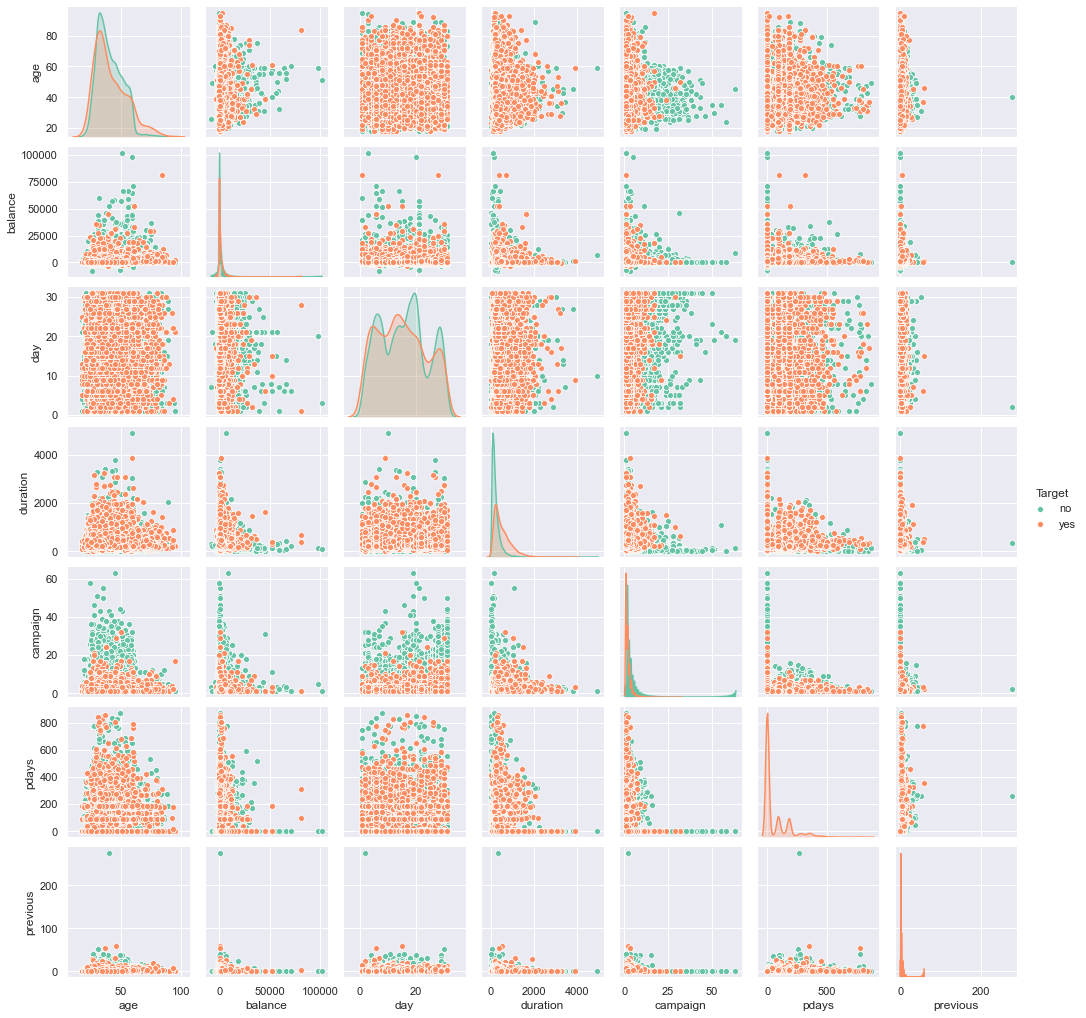

In [26]:
sns.pairplot(df, hue="Target", palette="Set2", height=2.0)

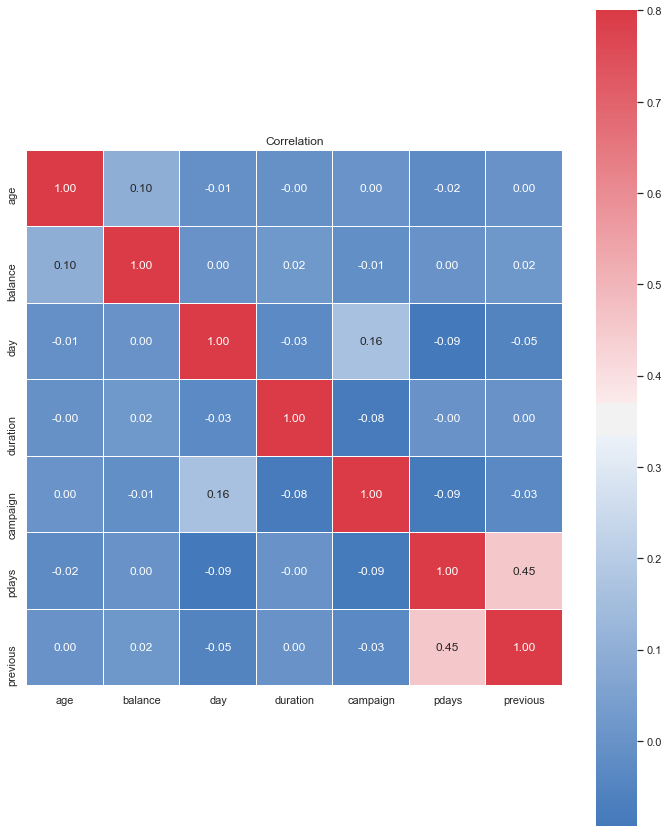

In [27]:
cmap = sns.diverging_palette(250, 10, as_cmap=True)
plt.figure(figsize=(12, 15))
ax = sns.heatmap(df.corr(), vmax=.8, square=True, fmt='.2f', cmap=cmap, annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

In [28]:
# mean values respect to Target
round(df.groupby('Target').mean(),2)

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
no,40.84,1303.71,15.89,221.18,2.85,36.42,0.50
yes,41.67,1804.27,15.16,537.29,2.14,68.70,1.17


- Customers w/long term deposit have higher average age, balance account, and were contacted for longer duration compared with customers that don't have long term deposit.
- Customers with no long term deposit have more housing loan, personal loan, and credit default than customer with long term deposit.

## Deliverable – 2 (Prepare the data for analytics)
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

In [29]:
# object to categorical data type
col_obj =df.select_dtypes(include ='object')
for nun in col_obj:
        df[nun] = df[nun].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [30]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [31]:
# Binary Encoding coverting "yes" by 1 and "no" by 0 for further analysis
cat_col=['default','housing','loan','Target']
for cat in df[cat_col]:
        df[cat]=df[cat].apply(lambda x: 1 if x=='yes' else 0)

In [32]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [33]:
labelencoder_X=LabelEncoder()
df['job']=labelencoder_X.fit_transform(df['job'])
df['marital']=labelencoder_X.fit_transform(df['marital'])
df['education']=labelencoder_X.fit_transform(df['education'])
df['default']=labelencoder_X.fit_transform(df['default'])
df['housing']=labelencoder_X.fit_transform(df['housing'])
df['loan']=labelencoder_X.fit_transform(df['loan'])
df['contact']= labelencoder_X.fit_transform(df['contact']) 
df['month']= labelencoder_X.fit_transform(df['month']) 
df['poutcome'] = labelencoder_X.fit_transform(df['poutcome'])
df['Target'] = labelencoder_X.fit_transform(df['Target'])

In [34]:
df.shape

(45211, 17)

In [35]:
df.isnull().count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
Target       45211
dtype: int64

#### Create the training set and test set in ratio of 70:30

In [36]:
X = df.drop('Target',axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [37]:
# Check the Split of the Data

print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


#### Using SMOTE for oversampled imbalanced classification data

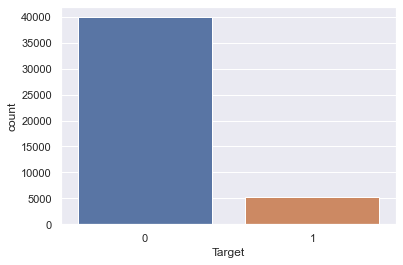

In [38]:
sy = len(df.Target[df.Target==1])
sn = len(df.Target[df.Target==0])
sns.countplot(x='Target', data=df)

In [39]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, ADASYN

ms = SMOTE(random_state=0)
X_res, y_res = ms.fit_sample(X_train, y_train)

#### Scaling colummns to treat outliers.

In [40]:
stdsc= StandardScaler()
X_train1 = pd.DataFrame(stdsc.fit_transform(X_train))
X_test1 = pd.DataFrame(stdsc.transform(X_test))

## Deliverable – 3 (create the ensemble model)

#### 1. Logistic Regression

In [41]:
# Fit the model on training dataset
model = LogisticRegression(solver="liblinear")
model.fit(X_train1, y_train)

#predict on test
y_predict = model.predict(X_test1)


logdf = pd.DataFrame(model.coef_)
logdf['intercept'] = model.intercept_
print(logdf)

          0         1         2         3         4         5         6  \
0  0.084469  0.026292  0.137921  0.145306 -0.077882  0.062069 -0.518166   

          7         8         9        10        11        12        13  \
0 -0.250984 -0.563922 -0.055306  0.128751  1.042934 -0.409856  0.355431   

         14        15  intercept  
0  0.190563  0.229125  -2.694673  


In [42]:
#Training Scores

print(classification_report(y_train, model.predict(X_train1)))

print('Accuracy Score')
print(accuracy_score(y_train,model.predict(X_train1)))
print('')
print('Confusion Matrix')
cm2=confusion_matrix(y_train, model.predict(X_train1))
print(cm2)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     27909
           1       0.60      0.23      0.33      3738

    accuracy                           0.89     31647
   macro avg       0.75      0.61      0.64     31647
weighted avg       0.87      0.89      0.87     31647

Accuracy Score
0.8910797231965115

Confusion Matrix
[[27333   576]
 [ 2871   867]]


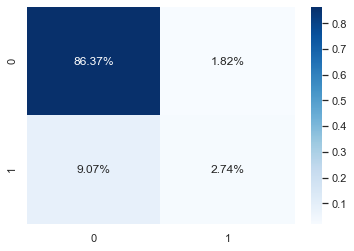

In [43]:
# Testing Data Confusion Matrix
sns.heatmap(cm2/np.sum(cm2), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()

In [44]:
LogReg_prob=model.predict_proba(X_train1)
fpr1,tpr1,thresholds1=roc_curve(y_train,LogReg_prob[:,1])
roc_auc1=auc(fpr1,tpr1)
print("Area under the ROC curve for training : %f" % roc_auc1)

Area under the ROC curve for training : 0.873598


In [45]:
# Testing Scores
print(classification_report(y_test,y_predict))

print('Accuracy Score')
print(accuracy_score(y_test,y_predict))
print('')
cm=confusion_matrix(y_test,y_predict)
print('Confusion Matrix')
print(cm)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.56      0.21      0.31      1551

    accuracy                           0.89     13564
   macro avg       0.73      0.60      0.62     13564
weighted avg       0.87      0.89      0.87     13564

Accuracy Score
0.8910350928929519

Confusion Matrix
[[11758   255]
 [ 1223   328]]


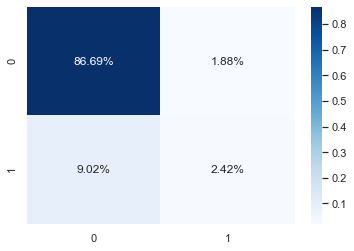

In [46]:
# Testing Data Confusion Matrix
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()

In [47]:
LogReg_prob=model.predict_proba(X_test1)
fpr1,tpr1,thresholds1=roc_curve(y_test,LogReg_prob[:,1])
roc_auc1=auc(fpr1,tpr1)
print("Area under the ROC curve for test : %f" % roc_auc1)

Area under the ROC curve for test : 0.869945


#### Summary
1. Accuracy of training data = 0.89
2. Accuracy of test data = 0.89
3. Area under the ROC curve for training = 0.87
4. Area under the ROC curve for test = 0.87
5. For predicting a yes to "Target", precision 0.56 and f-1 score is 0.31.

Model is overfit

#### Decision Tree

In [48]:
# Decision Tree, played around with depth to get best tree.
DT = DecisionTreeClassifier(criterion = 'entropy', max_depth=5,random_state=1)
DT.fit(X_train1, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

In [49]:
pd.DataFrame(DT.feature_importances_, columns = ["Imp"], index = X_train1.columns)

,Imp
0,0.001218
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000914
6,0.069479
7,0.000000
8,0.154120
9,0.003203


#### - duration, month and balance have the highest importance

Training data score =  0.8942079817992227
Test data score =  0.8929519315836036
Confusion matrix Actual numbers for prediction :
         No  Yes
No   11753  260
Yes   1192  359


Text(0.5, 1.0, 'Confusion matrix')

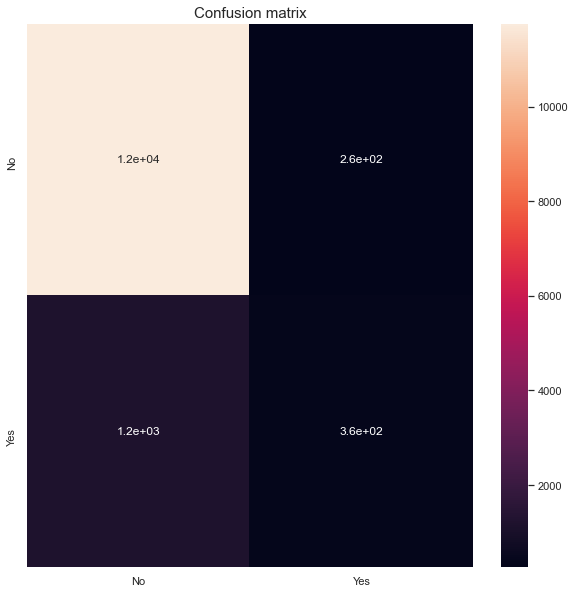

In [50]:
print("Training data score = ", DT.score(X_train1,y_train))
print("Test data score = ",DT.score(X_test1,y_test))

Y_Predict = DT.predict(X_test1)
Y_True = y_test
Confusion = confusion_matrix(Y_True,Y_Predict,labels=[0,1])

Df_Confusion = pd.DataFrame(Confusion, index=[i for i in ['No','Yes']],columns=[i for i in ['No','Yes']])
print("Confusion matrix Actual numbers for prediction :\n",Df_Confusion)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(Df_Confusion,annot=True)
ax.set_title("Confusion matrix",fontdict={'fontsize':15,'fontweight':1})

In [51]:
DTA = accuracy_score(y_test,Y_Predict)
DTS = recall_score(y_test,Y_Predict)
DTP = precision_score(y_test,Y_Predict)
DTF1 = f1_score(y_test,Y_Predict)
print("Accurancy Score for DT : ",DTA)
print("Recall Score for DT : ",DTS)
print("Precision Score for DT : ",DTP)
print("F1 Score for DT : ", DTF1)

Accurancy Score for DT :  0.8929519315836036
Recall Score for DT :  0.2314635718891038
Precision Score for DT :  0.5799676898222941
F1 Score for DT :  0.33087557603686635


#### For predicting a yes to "Target", precision 0.56 and f-1 score is 0.31.

#### Random Forest Classifier

In [52]:
# RF 
Random_Model = RandomForestClassifier(n_estimators=10,criterion='entropy')
Random_Model = Random_Model.fit(X_train1,y_train)
Model_Prediction = Random_Model.predict(X_test1)

Score of the Random Forest Training :  0.9920371599203716 

Score of the Random Forest Testing :  0.9039368917723385 

Confusion matrix Actual numbers for prediction :
         No  Yes
No   11666  347
Yes    956  595


Text(0.5, 1.0, 'Confusion matrix')

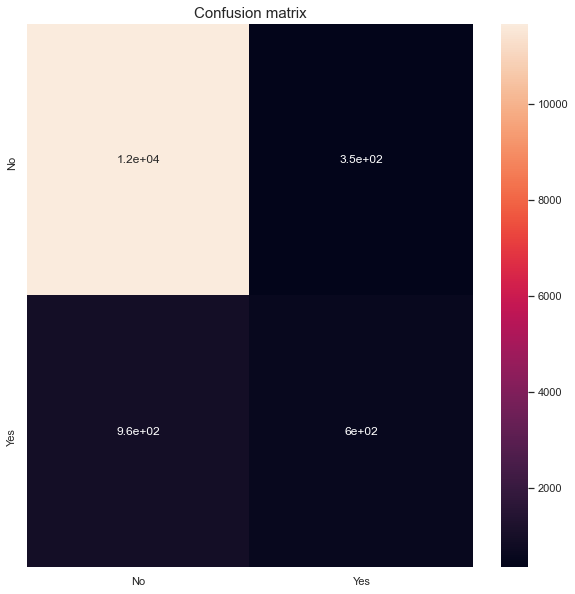

In [53]:
#Confusion Matrix

print("Score of the Random Forest Training : ",Random_Model.score(X_train1,y_train),"\n")
print("Score of the Random Forest Testing : ",Random_Model.score(X_test1,y_test),"\n")

YRam_Predict = Random_Model.predict(X_test1)
YRam_True = y_test
ConfusionRam = confusion_matrix(YRam_True,YRam_Predict,labels=[0,1])

Df_ConfusionRam = pd.DataFrame(ConfusionRam, index=[i for i in ['No','Yes']],columns=[i for i in ['No','Yes']])
print("Confusion matrix Actual numbers for prediction :\n",Df_ConfusionRam)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(Df_ConfusionRam,annot=True)
ax.set_title("Confusion matrix",fontdict={'fontsize':15,'fontweight':12})

In [54]:
Random_Model_Random_Acc = accuracy_score(y_test,Model_Prediction)
Random_Model_recall_Score = recall_score(y_test,Model_Prediction)
Random_Model_precision_score = precision_score(y_test,Model_Prediction)
Random_Model_f1_score = f1_score(y_test,Model_Prediction)
print("Accurancy Score for Random Forest : ",Random_Model_Random_Acc)
print("Recall Score for Random Forest : ",Random_Model_recall_Score)
print("Precision Score for Random Forest : ",Random_Model_precision_score)
print("F-1 Score for Random Forest : ", Random_Model_f1_score)

Accurancy Score for Random Forest :  0.9039368917723385
Recall Score for Random Forest :  0.3836234687298517
Precision Score for Random Forest :  0.6316348195329087
F-1 Score for Random Forest :  0.47733654231849176


#### Bagging Classifier Model

In [55]:
Bag_Model = BaggingClassifier(n_estimators=50, max_samples=1.0, max_features=1.0)
Bag_Model = Bag_Model.fit(X_train1,y_train)
Bag_Predictor = Bag_Model.predict(X_test1)

Score of training Bagging Model :  0.9996840142825544 

Score of testing Bagging Model:  0.9040843409023887 

Confusion matrix Actual numbers for prediction :
         No  Yes
No   11517  496
Yes    805  746


Text(0.5, 1.0, 'Confusion matrix')

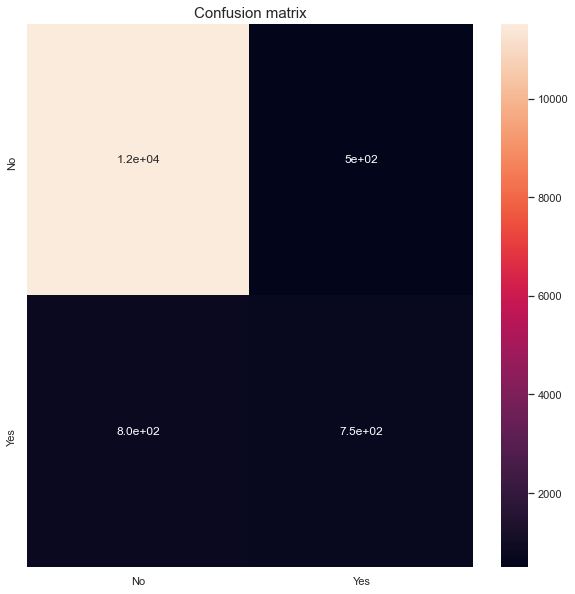

In [56]:
print("Score of training Bagging Model : ",Bag_Model.score(X_train1,y_train),"\n")
print("Score of testing Bagging Model: ",Bag_Model.score(X_test1,y_test),"\n")

YBag_Predict = Bag_Model.predict(X_test1)
YBag_True = y_test
ConfusionBag = confusion_matrix(YBag_True,YBag_Predict,labels=[0,1])

Df_ConfusionBag = pd.DataFrame(ConfusionBag, index=[i for i in ['No','Yes']],columns=[i for i in ['No','Yes']])
print("Confusion matrix Actual numbers for prediction :\n",Df_ConfusionBag)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(Df_ConfusionBag,annot=True)
ax.set_title("Confusion matrix",fontdict={'fontsize':15,'fontweight':1})

In [57]:
Bag_Model_Bag_Acc = accuracy_score(y_test,Bag_Predictor)
Bag_Model_recall_Score = recall_score(y_test,Bag_Predictor)
Bag_Model_precision_score = precision_score(y_test,Bag_Predictor)
Bag_Model_f1_score = f1_score(y_test,Model_Prediction)
print("Accurancy Score for Bag Model : ",Bag_Model_Bag_Acc)
print("Recall Score for Bag Model : ",Bag_Model_recall_Score)
print("Precision Score for Bag Model : ",Bag_Model_precision_score)
print("F-1 Score for Bag Model : ", Bag_Model_f1_score)

Accurancy Score for Bag Model :  0.9040843409023887
Recall Score for Bag Model :  0.4809800128949065
Precision Score for Bag Model :  0.6006441223832528
F-1 Score for Bag Model :  0.47733654231849176


#### Ada Boosting Model

In [58]:
Ada_Model = AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=100)
Ada_Model = Ada_Model.fit(X_train1,y_train)
Ada_Prediction = Ada_Model.predict(X_test1)

Ada Boosting training score :  0.8986001832717161 

Ada Boosting testing score :  0.8984812739604836 

Confusion matrix Actual numbers for prediction :
         No  Yes
No   11673  340
Yes   1037  514


Text(0.5, 1.0, 'Confusion matrix')

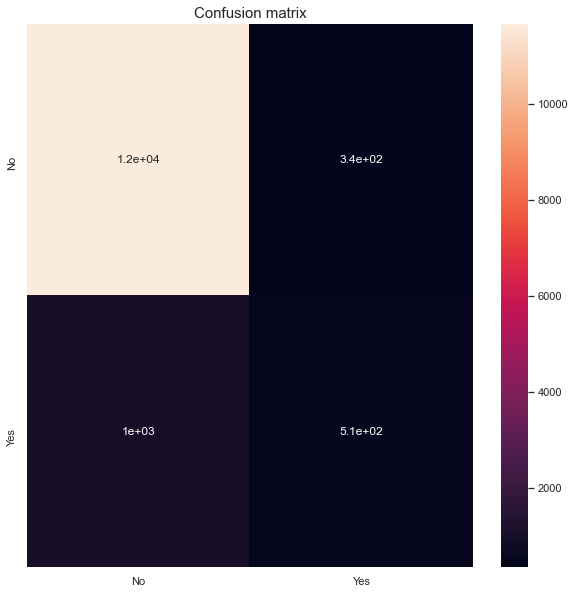

In [59]:
print("Ada Boosting training score : ",Ada_Model.score(X_train1,y_train),"\n")
print("Ada Boosting testing score : ",Ada_Model.score(X_test1,y_test),"\n")
from sklearn.metrics import confusion_matrix
YAda_Predict = Ada_Model.predict(X_test1)
YAda_True = y_test
ConfusionAda = confusion_matrix(YAda_True,YAda_Predict,labels=[0,1])

Df_ConfusionAda = pd.DataFrame(ConfusionAda, index=[i for i in ['No','Yes']],columns=[i for i in ['No','Yes']])
print("Confusion matrix Actual numbers for prediction :\n",Df_ConfusionAda)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(Df_ConfusionAda,annot=True)
ax.set_title("Confusion matrix",fontdict={'fontsize':15,'fontweight':1})

In [60]:
Ada_Model_Ada_Acc = accuracy_score(y_test,Ada_Prediction)
Ada_Model_recall_Score = recall_score(y_test,Ada_Prediction)
Ada_Model_precision_score = precision_score(y_test,Ada_Prediction)
Ada_Model_f1_score = f1_score(y_test,Model_Prediction)
print("Accurancy Score for Ada Model : ",Ada_Model_Ada_Acc)
print("Recall Score for Ada Model : ",Ada_Model_recall_Score)
print("Precision Score for Ada Model : ",Ada_Model_precision_score)
print("F-1 Score for Ada Model : ", Ada_Model_f1_score)

Accurancy Score for Ada Model :  0.8984812739604836
Recall Score for Ada Model :  0.33139909735654416
Precision Score for Ada Model :  0.6018735362997658
F-1 Score for Ada Model :  0.47733654231849176


#### Gradient Classifier

In [61]:
Grad_Model = GradientBoostingClassifier(n_estimators=50,learning_rate=0.1)
Grad_Model = Grad_Model.fit(X_train1,y_train)
Grad_Predictor = Grad_Model.predict(X_test1)

Gradient Classifier training score :  0.9049830947641166 

Gradient Classifier testing score :  0.9004718372161604 

Confusion matrix Actual numbers for prediction :
         No  Yes
No   11716  297
Yes   1053  498


Text(0.5, 1.0, 'Confusion matrix')

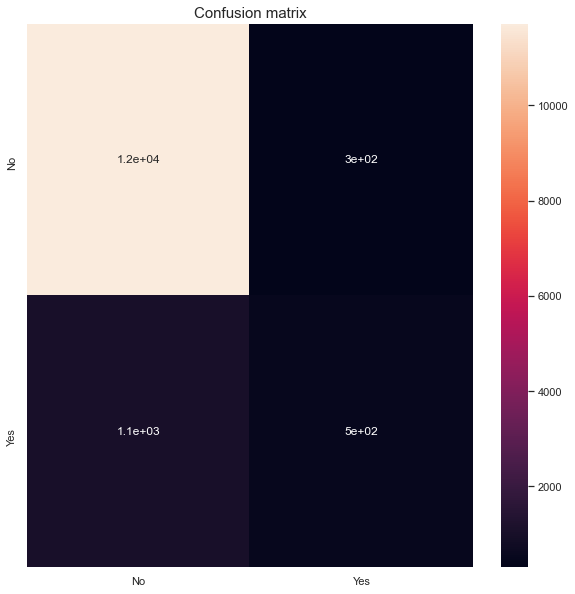

In [62]:
print("Gradient Classifier training score : ",Grad_Model.score(X_train1,y_train),"\n")
print("Gradient Classifier testing score : ",Grad_Model.score(X_test1,y_test),"\n")

YGrad_Predict = Grad_Model.predict(X_test1)
YGrad_True = y_test
ConfusionGrad = confusion_matrix(YGrad_True,YGrad_Predict,labels=[0,1])

Df_ConfusionGrad = pd.DataFrame(ConfusionGrad, index=[i for i in ['No','Yes']],columns=[i for i in ['No','Yes']])
print("Confusion matrix Actual numbers for prediction :\n",Df_ConfusionGrad)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(Df_ConfusionGrad,annot=True)
ax.set_title("Confusion matrix",fontdict={'fontsize':15,'fontweight':1})

In [63]:
Grad_Model_Grad_Acc = accuracy_score(y_test,Grad_Predictor)
Grad_Model_recall_Score = recall_score(y_test,Grad_Predictor)
Grad_Model_precision_score = precision_score(y_test,Grad_Predictor)
Grad_Model_F1_Score = f1_score(y_test,Grad_Predictor)
print("Accurancy Score for Gradient booster model : ",Grad_Model_Grad_Acc)
print("Recall Score for Gradient booster model : ",Grad_Model_recall_Score)
print("Precision Score for Gradient booster model : ",Grad_Model_precision_score)
print("F1 score for Gradient booster model : ",Grad_Model_F1_Score)

Accurancy Score for Gradient booster model :  0.9004718372161604
Recall Score for Gradient booster model :  0.32108317214700194
Precision Score for Gradient booster model :  0.6264150943396226
F1 score for Gradient booster model :  0.4245524296675192


In [64]:
resultsDf = pd.DataFrame({'Method':['1','2','3','4','5'],
                          'Accuracy': [DTA,Random_Model_Random_Acc,Bag_Model_Bag_Acc,Ada_Model_Ada_Acc,Grad_Model_Grad_Acc],
                          'Recall_Score':[DTS,Random_Model_recall_Score,Bag_Model_recall_Score,Ada_Model_recall_Score,Grad_Model_recall_Score],
                          'Precission_Score':[DTP,Random_Model_precision_score,Bag_Model_precision_score,Ada_Model_precision_score,Grad_Model_precision_score],
                          'f1_score':[DTF1,Random_Model_f1_score,Bag_Model_f1_score,Ada_Model_f1_score,Grad_Model_F1_Score]},
                          index=['Decision Tree','Random Forest','Bagging Classifiers','Ada Booster','Gradient Boosting'])
resultsDf = resultsDf[['Method', 'Accuracy', 'Recall_Score','Precission_Score','f1_score']]
resultsDf

,Method,Accuracy,Recall_Score,Precission_Score,f1_score
Decision Tree,1,0.892952,0.231464,0.579968,0.330876
Random Forest,2,0.903937,0.383623,0.631635,0.477337
Bagging Classifiers,3,0.904084,0.480980,0.600644,0.477337
Ada Booster,4,0.898481,0.331399,0.601874,0.477337
Gradient Boosting,5,0.900472,0.321083,0.626415,0.424552


##### Conclusions

The unbalanced 'Target' value was balanced using SMOTE. Scaling was also used to help standardize the data. After standardization and data splitting, logistic regression was done (precision of 0.56, recall of 0.21, f1 of 0.31, and accuracy of 0.89) 

After ensemble techniques were used as shown above in the table. They all have ~90% accuracy with the Bagging classifiers having the highest at 91%. The Bagging classifiers model was the best model overall as well with highest recall score (0.47), the second highest precision score (0.61) and the highest f1 score (0.46). 